# Housing: Price Prediction<br><br><br>
**Problem Statement:**<br><br>
Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. <br><br>
Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. <br><br>
The company is looking at prospective properties to buy houses to enter the market. We are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:<br><br>
• Which variables are important to predict the price of variable?<br>
• How do these variables describe the price of the house?<br><br><br>

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting display options for the dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Loading the dataset

In [3]:
# loading train data
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\housing_train.csv")

### Exploratory Data Analysis

In [4]:
# checking first five rows of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [5]:
# checking last five rows of the dataset
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,457,Unf,0,326,783,GasA,Ex,Y,SBrkr,807,702,0,1509,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,393,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [6]:
# checking shape of the dataset
df.shape

(1168, 81)

We can see that there are 1168 rows and 81 columns in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

This describes the information of the the columns of the dataset. It shows the column names, count and datatype.<br>
We can see that there are three(3) columns of float64 datatype, thirty five(35) columns of int64 datatype and forty three(43) columns of object datatype.

In [8]:
# checking the null values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We can see that there are null values in LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond,  PoolQC, Fence and MiscFeature.

**Handling Missing Values**

In [9]:
# Getting the number of missing values in each column
num_missing = df.isna().sum()
# Excluding columns that contains 0 missing values
num_missing = num_missing[num_missing > 0]
# Getting the percentages of missing values
percent_missing = num_missing * 100 / df.shape[0]
# Concatenating the number and perecentage of missing values 
# into one dataframe and sorting it
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
PoolQC,1161,99.400685
MiscFeature,1124,96.232877
Alley,1091,93.407534
Fence,931,79.708904
FireplaceQu,551,47.174658
LotFrontage,214,18.321918
GarageType,64,5.479452
GarageYrBlt,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452


The percentage of missing values in PoolQC column is 99.40% which is very high. A missing value in this column might denote that the corresponding house doesn't have a pool. To verify this, let's take a look at the values of Pool Area column.

In [10]:
df["PoolArea"].value_counts()

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

We can see that there are 1161 entries in PoolArea column that have a value of 0. This verfies our hypothesis that each house without a pool has a missing value in Pool QC column and a value of 0 in Pool Area column. So let's fill the missing values in Pool QC column with "No Pool"

In [11]:
df["PoolQC"].fillna("No Pool", inplace=True)

The percentage of missing values in Pool QC column is 96.23% which is very high also. Let's take a look at the values of Misc Val column

In [12]:
df["MiscVal"].value_counts()

0        1126
400        10
500         7
2000        4
700         3
600         3
1200        2
15500       1
1150        1
800         1
620         1
1400        1
480         1
2500        1
450         1
1300        1
350         1
8300        1
54          1
560         1
Name: MiscVal, dtype: int64

We can see that MiscVal column has 1126 entries with a value of 0.  Then, as with Pool QC, we can say that each house without a "miscellaneous feature" has a missing value in Misc Feature column and a value of 0 in Misc Val column. So let's fill the missing values in Misc Feature column with "No Feature":

In [13]:
df['MiscFeature'].fillna('No feature', inplace=True)

According to the dataset documentation, NA in Alley, Fence, and FireplaceQu columns denotes that the house doesn't have an alley, fence, or fireplace. So we fill in the missing values in these columns with "No Alley", "No Fence", and "No Fireplace" accordingly:

In [14]:
df['Alley'].fillna('No Alley', inplace=True)
df['Fence'].fillna('No Fence', inplace=True)
df['FireplaceQu'].fillna('No Fireplace', inplace=True)

As we saw previously, Lot Frontage represents the linear feet of street connected to the house. So we assume that the missing values in this column indicates that the house is not connected to any street, and we fill in the missing values with 0

In [15]:
df['LotFrontage'].fillna(0, inplace=True)

According to the dataset documentation, NA in GarageCond, GarageQual, GarageFinish, and GarageType indicates that there is no garage in the house. So we fill in the missing values in these columns with "No Garage". We notice that GarageCond, GarageQual, GarageFinish, GarageYrBlt columns have 64 missing values each. 

In [16]:
df['GarageCars'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

df.loc[~pd.isna(df['GarageType']) & 
            pd.isna(df['GarageQual']), "GarageType"] = "No Garage"

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col].fillna('No Garage', inplace=True)
    
df['GarageYrBlt'].fillna(0, inplace=True)

Similarly, checking remaining columns that has missing values and replacing them.

In [17]:
for col in ["BsmtHalfBath", "BsmtFullBath", "TotalBsmtSF", 
            "BsmtUnfSF", "BsmtFinSF2", "BsmtFinSF1"]:
    df[col].fillna(0, inplace=True)

df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtExposure']), "BsmtExposure"] = "No"
df.loc[~pd.isna(df['BsmtCond']) & 
            pd.isna(df['BsmtFinType2']), "BsmtFinType2"] = "Unf"

for col in ["BsmtExposure", "BsmtFinType2", 
            "BsmtFinType1", "BsmtQual", "BsmtCond"]:
    df[col].fillna("No Basement", inplace=True)

In [18]:
df['MasVnrArea'].fillna(0, inplace=True)
df['MasVnrType'].fillna("None", inplace=True)

Now let's check if there is any remaining missing value in our dataset

In [19]:
df.isna().values.sum()

0

We can see that there are no missing values in the dataset now.

**Outliers**

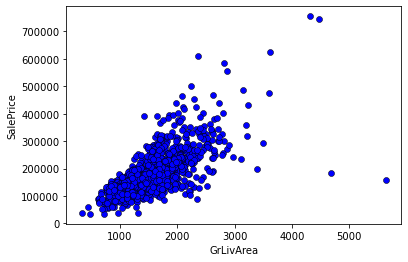

In [20]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="blue", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

We can see that there are few outliers. Now, we will remove them from our dataset. We can do so by keeping data points that have GrLivArea less than 4,000. But first we take a look at the dataset rows that correspond to these unusual values

In [21]:
outlirt_columns = ["GrLivArea"] + \
                  [col for col in df.columns if "Sale" in col]
df[df["GrLivArea"] > 4000][outlirt_columns]

,GrLivArea,SaleType,SaleCondition,SalePrice
141,4476,WD,Abnorml,745000
361,4676,New,Partial,184750
592,5642,New,Partial,160000
691,4316,WD,Normal,755000


In [22]:
# removing outliers from GrLivArea column
df = df[df["GrLivArea"] < 4000]

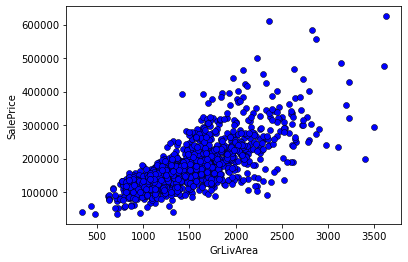

In [23]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="blue", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

In [24]:
#To avoid problems in modeling later, we will reset our dataset index after removing the outlier rows, so no gaps remain in our dataset inde
df.reset_index(drop=True, inplace=True)

**Deleting Unimportant Columns**

We will delete columns that are not useful in our analysis. The column to be deleted is Id

In [25]:
df.drop(['Id'], axis=1, inplace=True)

Let us understand the target variable distribution now.

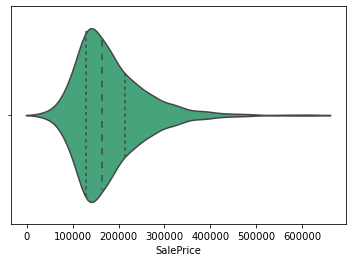

In [26]:
sns.violinplot(x=df['SalePrice'], inner="quartile", color="#36B37E");

We can see from the plot that most house prices fall between 100,000 and 250,000. The dashed lines represent the locations of the three quartiles Q1, Q2 (the median), and Q3.

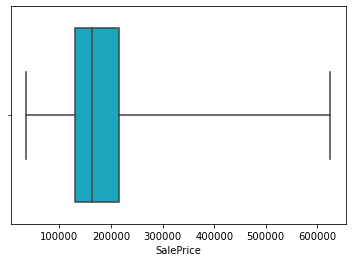

In [27]:
sns.boxplot(df['SalePrice'], whis=10, color="#00B8D9");

This shows us the minimum and maximum values of SalePrice. It shows us also the three quartiles represented by the box and the vertical line inside of it. 

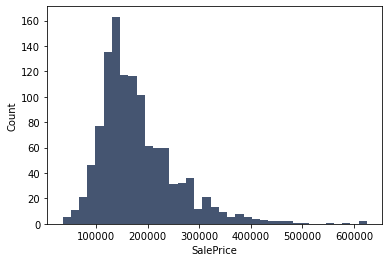

In [28]:
sns.distplot(df['SalePrice'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

**Correlation**

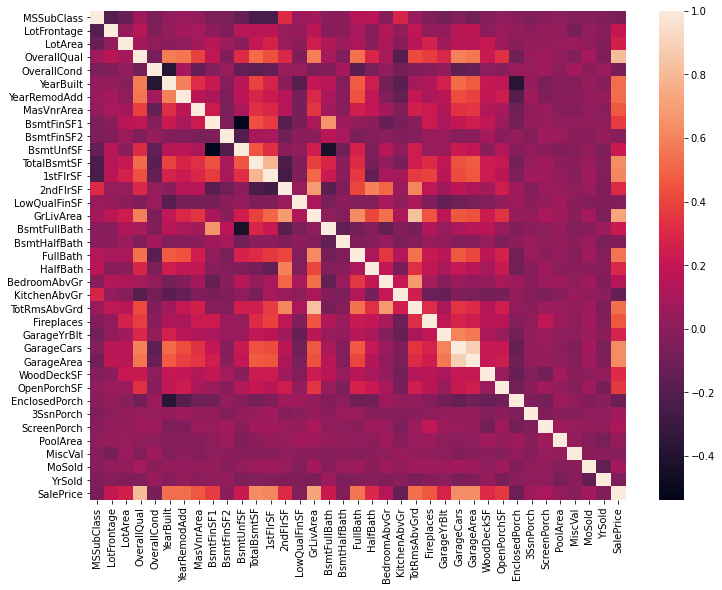

In [29]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(), ax=ax);

* We notice that GarageCars and GarageArea have high positive correlation which is reasonable because when the garage area increases, its car capacity increases too. 
*  We see also that GrLivArea and TotRms AbvGrd are highly positively correlated which also makes sense because when living area above ground increases, it is expected for the rooms above ground to increase too.
* We can see that BsmtUnfSF is negatively correlated with BsmtFinSF1
* We note also that BsmtUnfSF is negatively correlated with BsmtFullBath
* We see that the target variable(SalePrice) is highly positively correlated with OverallQual and GrLivArea. We see also that the target variable is positively correlated with YearBuilt, Year Remod/Add, MasVnrArea, TotalBsmtSF, 1stFlrSF, FullBath, GarageCars, and GarageArea.

**Let us check the relation between target variable and other variables**

----> High Positive Correlation

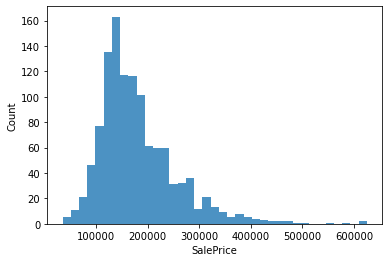

In [30]:
sns.distplot(df['SalePrice'], kde=False, 
             hist_kws={"alpha": 0.8});
plt.ylabel("Count");

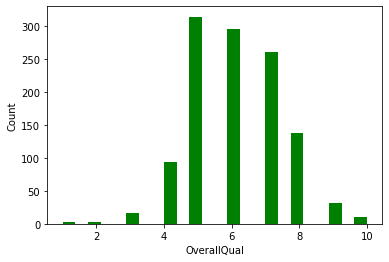

In [31]:
sns.distplot(df['OverallQual'], kde=False, 
             color= 'green', hist_kws={"alpha": 1});
plt.ylabel("Count");

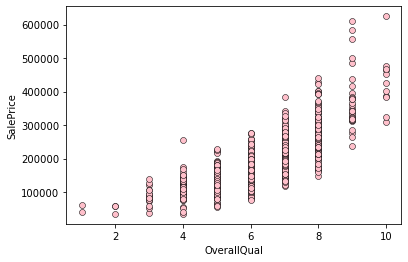

In [32]:
plt.scatter(x=df['OverallQual'], y=df['SalePrice'], 
            color="pink", edgecolors="#000000", linewidths=0.5);
plt.xlabel("OverallQual"); plt.ylabel("SalePrice");

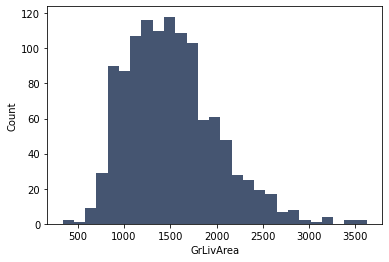

In [33]:
sns.distplot(df['GrLivArea'], kde=False, 
             color="#172B4D", hist_kws={"alpha": 0.8});
plt.ylabel("Count");

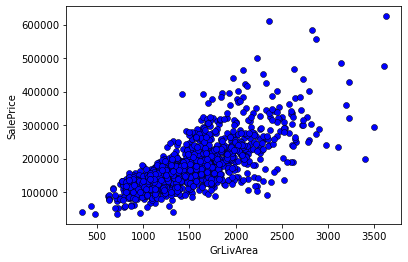

In [34]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], 
            color="blue", edgecolors="#000000", linewidths=0.5);
plt.xlabel("GrLivArea"); plt.ylabel("SalePrice");

----> Moderate Positive Correlation

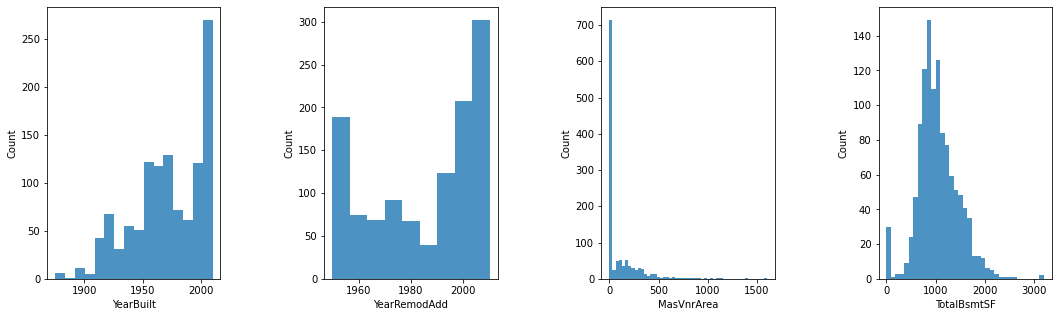

In [35]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["YearBuilt", "YearRemodAdd", 
                             "MasVnrArea", "TotalBsmtSF"]):
    sns.distplot(df[v], kde=False, 
                 hist_kws={"alpha": 0.8}, ax=ax)
    ax.set(ylabel="Count");

Now let us see their relationships with the target variable using scatter plots:

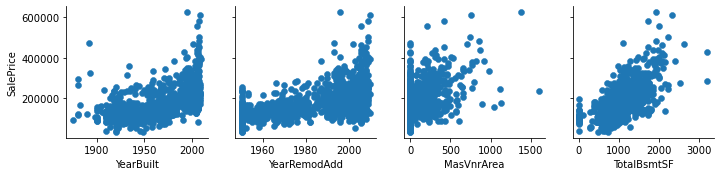

In [36]:
x_vars = ["YearBuilt", "YearRemodAdd", "MasVnrArea", "TotalBsmtSF"]
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, linewidths=0.5);

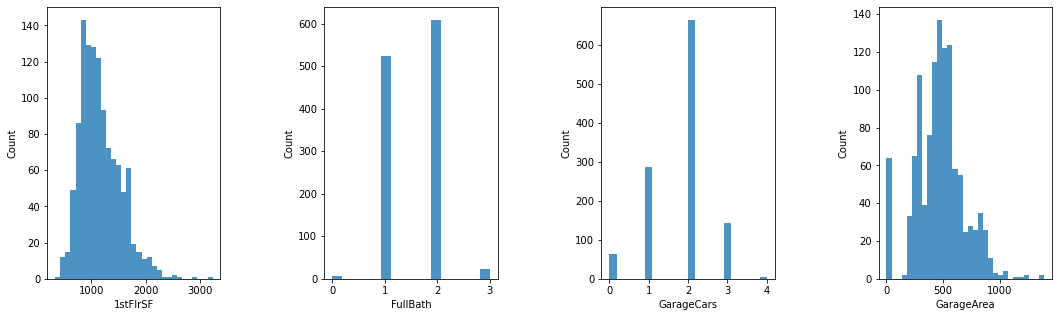

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["1stFlrSF", "FullBath", 
                             "GarageCars", "GarageArea"]):
    sns.distplot(df[v], kde=False,  
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count");

Relationship with target variable

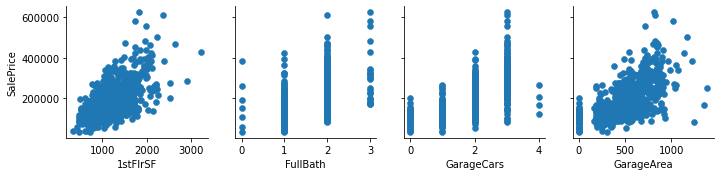

In [38]:
x_vars = ["1stFlrSF", "FullBath", "GarageCars", "GarageArea"]
g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=x_vars);
g.map(plt.scatter, linewidths=0.5);

----> Negtive relationship

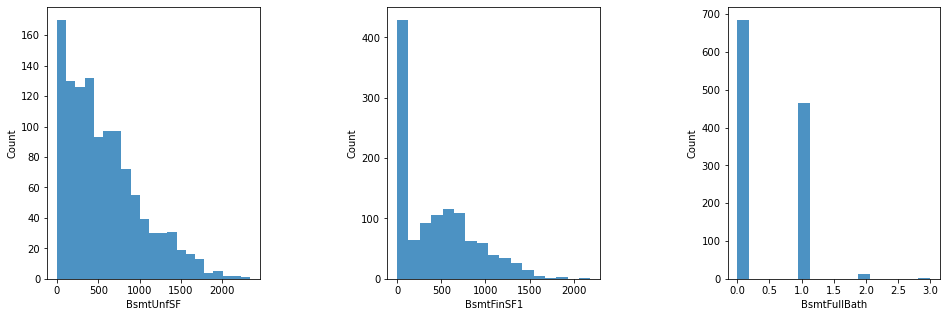

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for ax, v in zip(axes.flat, ["BsmtUnfSF", "BsmtFinSF1", "BsmtFullBath"]):
    sns.distplot(df[v], kde=False,  
                 hist_kws={"alpha": 0.8}, ax=ax);
    ax.set(ylabel="Count")

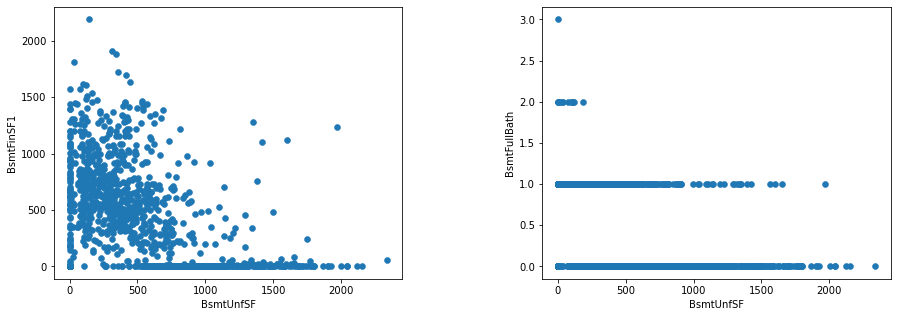

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
axes[0].scatter(df["BsmtUnfSF"], df["BsmtFinSF1"],
                 linewidths=0.5);
axes[0].set(xlabel="BsmtUnfSF", ylabel="BsmtFinSF1");
axes[1].scatter(df["BsmtUnfSF"], df["BsmtFullBath"],
                 linewidths=0.5);
axes[1].set(xlabel="BsmtUnfSF", ylabel="BsmtFullBath");

#### Encoding

---> Categorical Features

In [41]:
# One hot encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = OneHotEncoder(handle_unknown='ignore')
labelencoder=preprocessing.LabelEncoder()
df['PavedDrive'] = labelencoder.fit_transform(df["PavedDrive"])

In [42]:
df['Exterior1st'] = labelencoder.fit_transform(df["Exterior1st"])

In [43]:
df['Exterior2nd'] = labelencoder.fit_transform(df["Exterior2nd"])

In [44]:
df['MasVnrType'] = labelencoder.fit_transform(df["MasVnrType"])

In [45]:
df['Foundation'] = labelencoder.fit_transform(df["Foundation"])

In [46]:
df['Heating'] = labelencoder.fit_transform(df["Heating"])
df['GarageType'] = labelencoder.fit_transform(df["GarageType"])
df['Electrical'] = labelencoder.fit_transform(df["Electrical"])
df['MiscFeature'] = labelencoder.fit_transform(df["MiscFeature"])
df['SaleType'] = labelencoder.fit_transform(df["SaleType"])
df['SaleCondition'] = labelencoder.fit_transform(df["SaleCondition"])

---> Ordinal variables

In [49]:
mp = {'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0}
df['ExterQual'] = df['ExterQual'].map(mp)
df['ExterCond'] = df['ExterCond'].map(mp)
df['HeatingQC'] = df['HeatingQC'].map(mp)
df['KitchenQual'] = df['KitchenQual'].map(mp)

mp = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Basement':0}
df['BsmtQual'] = df['BsmtQual'].map(mp)
df['BsmtCond'] = df['BsmtCond'].map(mp)
df['BsmtExposure'] = df['BsmtExposure'].map(
    {'Gd':4,'Av':3,'Mn':2,'No':1,'No Basement':0})

mp = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'No Basement':0}
df['BsmtFinType1'] = df['BsmtFinType1'].map(mp)
df['BsmtFinType2'] = df['BsmtFinType2'].map(mp)

df['CentralAir'] = df['CentralAir'].map({'Y':1,'N':0})
df['Functional'] = df['Functional'].map(
    {'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
     'Maj2':2,'Sev':1,'Sal':0})
df['FireplaceQu'] = df['FireplaceQu'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Fireplace':0})
df['GarageFinish'] = df['GarageFinish'].map(
    {'Fin':3,'RFn':2,'Unf':1,'No Garage':0})
df['GarageQual'] = df['GarageQual'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['GarageCond'] = df['GarageCond'].map(
    {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'No Garage':0})
df['PoolQC'] = df['PoolQC'].map(
    {'Ex':4,'Gd':3,'TA':2,'Fa':1,'No Pool':0})
df['LandSlope'] = df['LandSlope'].map(
    {'Sev': 2, 'Mod': 1, 'Gtl': 0})
df['Fence'] = df['Fence'].map(
    {'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'No Fence':0})

df['MSZoning'] = df['MSZoning'].map({'RL':0, 'RM':1, 'FV': 2, 'RH':3, 'C (all)':4})
df['Street'] = df['Street'].map({'Pave':0, 'Grvl':1})

df['Alley'] = df['Alley'].map({'No Alley':0, 'Grvl':1, 'Pave':2})

df['LotShape'] = df['LotShape'].map({'IR1':0, 'Reg':1, 'IR2':2, 'IR3':3})

df['LandContour'] = df['LandContour'].map({'Lvl':0, 'Bnk':1, 'HLS':2, 'Low':3})

df['Utilities'] = df['Utilities'].map({'AllPub':0})

df['LotConfig'] = df['LotConfig'].map({'Inside':0, 'CulDSac':1, 'FR2':2, 'Corner':3, 'FR3':4})

df['Neighborhood'] = df['Neighborhood'].map({'NPkVill':0, 'NAmes':1, 'NoRidge':2, 'NWAmes':3, 'Gilbert':4, 'Sawyer':5,
       'Edwards':6, 'IDOTRR':7, 'CollgCr':8, 'Mitchel':9, 'Crawfor':10, 'BrDale':11,
       'StoneBr':12, 'BrkSide':13, 'NridgHt':14, 'OldTown':15, 'Somerst':16, 'Timber':17,
       'SWISU':18, 'SawyerW':19, 'ClearCr':20, 'Veenker':21, 'Blmngtn':22, 'MeadowV':23,
       'Blueste':24})

df['Condition1'] = df['Condition1'].map({'Norm':0, 'Feedr':1, 'RRAn':2, 'PosA':3, 'RRAe':4, 'Artery':5, 'PosN':6, 'RRNe':7,
       'RRNn':8})

df['Condition2'] = df['Condition2'].map({'Norm':0, 'RRAe':1, 'Feedr':2, 'Artery':3, 'RRNn':4, 'PosA':5, 'PosN':6, 'RRAn':7})

df['BldgType'] = df['BldgType'].map({'TwnhsE':0, '1Fam':1, 'Duplex':2, 'Twnhs':3, '2fmCon':4})

In [50]:
df['HouseStyle'] = df['HouseStyle'].map({'1Story':0, '2Story':1, '1.5Fin':2, 'SFoyer':3, '1.5Unf':4, 'SLvl':5, '2.5Fin':6,
       '2.5Unf':7})

df['RoofStyle'] = df['RoofStyle'].map({'Gable':0, 'Flat':1, 'Hip':2, 'Shed':3, 'Gambrel':4, 'Mansard':5})

df['RoofMatl'] = df['RoofMatl'].map({'CompShg':0, 'Tar&Grv':1, 'WdShngl':2, 'WdShake':3, 'Roll':4, 'Metal':5,
       'Membran':6})

We have cleaned our data. We can now move to data modelling.

In [62]:
# Loading test data
df_test = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Project-Housing_splitted\\test.csv")

In [63]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


### Predictive Modeling

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

Splitting data for validation

In [52]:
X=df.drop(['SalePrice'], axis=1)
y=df['SalePrice']

In [53]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state=3)

In [54]:
print(X_train.shape, y_train.shape)

(814, 79) (814,)


-----> Checking Accuracies

Logistic Regression Model

In [55]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.002857142857142857


 Decision Tree Model

In [56]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)
print('The accuracy of the Decision Tree Model is ', metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree Model is  0.011428571428571429


K-Nearest Neighbours(KNN)

In [57]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the  K-Nearest Neighbours is  0.008571428571428572


Linear Support Vector Machine(linear-SVM)

In [59]:
model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
prediction_svm_l = model_svm_l.predict(X_test)
print('The accuracy of the Linear Support Vector Machine is ', metrics.accuracy_score(prediction_svm_l, y_test))

The accuracy of the Linear Support Vector Machine is  0.008571428571428572


Random Forest

In [60]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))

The accuracy of the  Random Forest is  0.022857142857142857


Gaussian Naive Bayes

In [61]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the  Gaussian Naive Bayes is  0.014285714285714285


**Checking Mean Absolute Error of the Models.**

This tells us that the average difference between the actual data value and the value predicted by the model.

The lower the MAE for a given model, the more closely the model is able to predict the actual values.

**--->Linear Regression Model**

In [65]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

19454.107746670077


**--->Random Forest Model**

In [66]:

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import mean_absolute_error

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

27044.84857142857


**--->KNN Model**

In [67]:
from sklearn.neighbors import KNeighborsClassifier 

from sklearn.metrics import mean_absolute_error

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

53894.05714285714


**--->SVM Model**

In [69]:
from sklearn import svm

from sklearn.metrics import mean_absolute_error

model_svm_l = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model_svm_l.fit(X_train, y_train)
predictions = model_svm_l.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

34533.86571428571


**---> Naive Bayes Model**

In [70]:
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import mean_absolute_error

nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

37224.83714285714


**--->Decision Tree Model**

In [71]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import mean_absolute_error

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

mae = mean_absolute_error(y_test, predictions)

print(mae)

39591.422857142854


### Hyper Parameter Tuning

---> Decision Tree Model

In [73]:
model_tree = DecisionTreeClassifier(max_depth=14, min_samples_split=5, max_features=20)

In [74]:
parameter_space = {
    "max_depth": [7, 15],
    "min_samples_split": [5, 10],
    "max_features": [30, 45]
}

clf = GridSearchCV(DecisionTreeClassifier(), parameter_space, cv=4, 
                   scoring="neg_mean_absolute_error")

clf.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 15], 'max_features': [30, 45],
                         'min_samples_split': [5, 10]},
             scoring='neg_mean_absolute_error')

In [85]:
from sklearn.tree import DecisionTreeRegressor

parameter_space = \
    {
        "criterion": ["mse", "friedman_mse", "mae"],
        "min_samples_split": [5, 18, 29, 50],
        "min_samples_leaf": [3, 7, 15, 25],
        "max_features": [20, 50, 150, 200, X_train.shape[1]],
    }

clf = GridSearchCV(DecisionTreeRegressor(random_state=3), parameter_space, 
                   cv=3, scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'criterion': 'mae', 'max_features': 79, 'min_samples_leaf': 7, 'min_samples_split': 5}


In [86]:
dt_model = DecisionTreeRegressor(**clf.best_params_)

In [87]:
# Fitting the model
dt_model.fit(X_train, y_train);

In [88]:
y_pred = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, y_pred)
print("Decision Tree MAE =", dt_mae)

Decision Tree MAE = 27254.204285714284


---> KNN Model

In [76]:
from sklearn.neighbors import KNeighborsRegressor

parameter_space = {
    "n_neighbors": [9, 10, 11,50],
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "leaf_size": [1,2,20,50,200]
}

clf = GridSearchCV(KNeighborsRegressor(), parameter_space, cv=3, 
                   scoring="neg_mean_absolute_error", n_jobs=4)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 9, 'weights': 'distance'}


In [81]:
knn_model = KNeighborsRegressor(**clf.best_params_)

In [83]:
# Fitting the model
knn_model.fit(X_train, y_train);

In [84]:
y_pred = knn_model.predict(X_test)
knn_mae = mean_absolute_error(y_test, y_pred)
print("K-Nearest Neighbors MAE =", knn_mae)

K-Nearest Neighbors MAE = 31979.67946150494


---> Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestRegressor

parameter_space = \
    {
        "n_estimators": [10, 100, 300, 600],
        "criterion": ["mse", "mae"],
        "max_depth": [7, 50, 254],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 5],
        "max_features": [19, 100, X_train.shape[1]],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_space, cv=3, n_jobs=4,
                         scoring="neg_mean_absolute_error", 
                         n_iter=10, random_state=3)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 19, 'max_depth': 254, 'criterion': 'mse', 'bootstrap': False}


In [90]:
rf_model = RandomForestRegressor(**clf.best_params_)

In [91]:
# fitting the model
rf_model.fit(X_train, y_train);

In [92]:
y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print("Random Forest MAE =", rf_mae)

Random Forest MAE = 17517.426319047616


We can see that the mean absolute error (MAE)  is less for Random Forest Model when compared to other models. 

In [93]:
# Now, let's see the most important features as for Random Forest model

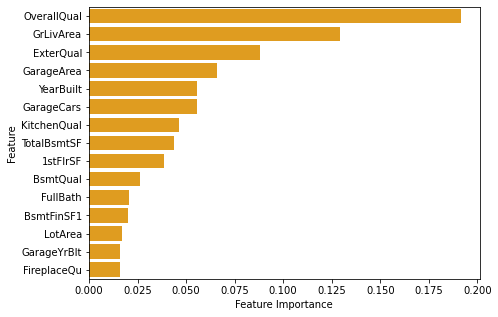

In [94]:
rf_feature_importances = rf_model.feature_importances_
rf_feature_importances = pd.Series(
    rf_feature_importances, index=X_train.columns.values
    ).sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7,5))
sns.barplot(x=rf_feature_importances, 
            y=rf_feature_importances.index, 
            color="#ffa600");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

**Predictions**

In [98]:
OutputDF=pd.DataFrame({'Actual Data':y_test,'Predicted Data':y_pred})
OutputDF.head()

,Actual Data,Predicted Data
355,256000,201305.475000
831,319000,296902.101667
984,195400,191507.910000
144,274000,266208.441667
411,131500,140648.771667


### Saving the model

In [99]:
import joblib

In [100]:
joblib.dump(rf_model, 'housing_price_prediction.pkl')

['housing_price_prediction.pkl']

In [101]:
# Load the model from the file
rf_model_from_joblib = joblib.load('housing_price_prediction.pkl') 

In [102]:
# Use the loaded model to make predictions
rf_model_from_joblib.predict(X_test)

array([201305.475     , 296902.10166667, 191507.91      , 266208.44166667,
       140648.77166667, 228615.42833333, 116816.85      , 137760.98666667,
       159658.28166667, 151960.00166667, 343552.28      , 211964.87      ,
       189658.40833333, 135334.01333333, 130389.03333333, 202147.98833333,
       132879.45      , 110932.44333333, 137573.02666667, 128050.46166667,
       189547.46333333, 123376.385     , 184816.77833333, 234214.15666667,
       262301.76666667, 322661.86166667, 194129.885     , 141607.925     ,
       148031.70333333, 152298.95833333, 154907.16333333, 180619.105     ,
       170432.12833333, 185347.59333333, 312649.445     ,  96191.44666667,
       154644.315     , 133948.48666667, 193853.34666667, 134738.645     ,
       143513.75      , 205150.73166667, 115884.08      , 186123.58      ,
       250120.545     , 284466.56666667, 100065.54666667, 199726.49166667,
       139263.86666667, 130565.20333333, 167996.21166667, 428920.585     ,
       188720.50833333, 2